In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
datasets = pd.read_csv('Social_Network_Ads.csv')
X = datasets.iloc[:, [2,3]].values
y = datasets.iloc[:, 4].values

In [4]:
datasets

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
from sklearn import svm
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [8]:
y_pred = model.predict(X_test)

In [9]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve, auc
print(confusion_matrix(y_test, y_pred))

[[64  4]
 [ 3 29]]


In [11]:
print(accuracy_score(y_test, y_pred))

0.93


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



Text(0.5, 0, 'False Positive Rate')

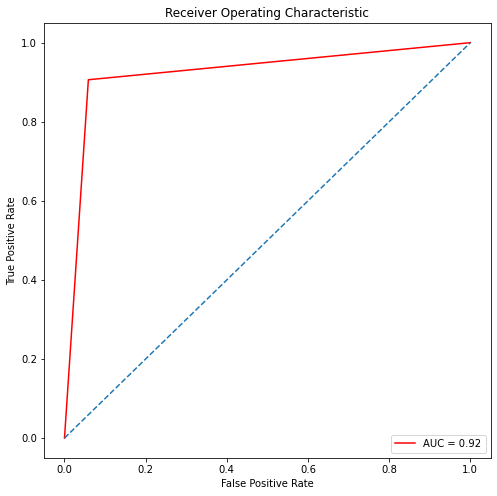

In [12]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlabel('False Positive Rate')

In [22]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,1
98,1,1


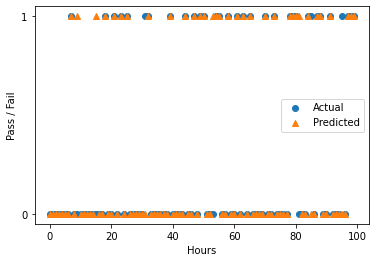

In [23]:
# Compare performance of Actual and Model 1 Prediction
plt.figure()
plt.scatter(df.index,df['Real Values'],label='Actual')
plt.scatter(df.index,df['Predicted Values'],label='Predicted',marker='^')
plt.legend(loc=7)
plt.yticks([0,1])
plt.xlabel('Hours')
plt.ylabel('Pass / Fail')
plt.show()

### Exercise
    Which of the following evaluation metrics can not be applied in classification models?
    A) AUC Score
    B) Accuracy
    C) F1-Score
    D) Mean-Squared-Error